# STOCK PREDICTTIONS : R

## About Dataset

## Context


According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

## Attribute Information

1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not


## 1. Define problems





## 2. Preparatory work



## 3. Exploratory data analysis(EDA)



## 4. Data Manipulation


## 5. Modeling


## Author : Santhosh

## Dataset : Kaggle

# 1. Define problems

#### Which features are related to stroke
#### Stroke prediction
#### Comparision of Logistic Regression vs Neural Network

# 2. Preparatory work

#### Solutions for every problems

# 3. Exploratory data analysis(EDA) : R


### Load Library and Dataset


In [1]:
# load library
library(dplyr) 
library(tidyverse)
 
library(corrplot) ## Correlation matrix plot library
library(PerformanceAnalytics)
library(corrplot)
library(Amelia)##check missing value libaray


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1     v readr   1.3.1
v tibble  2.1.1     v purrr   0.3.2
v tidyr   0.8.3     v stringr 1.4.0
v ggplot2 3.1.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
corrplot 0.84 loaded
Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.

In [2]:
# load Dataset
# read data from csv
df<-read.csv('C:/Users/natu/Downloads/healthcare-dataset-stroke-data.csv', header = TRUE)
df

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1
56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1
53882,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
10434,Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1
27419,Female,59,0,0,Yes,Private,Rural,76.15,N/A,Unknown,1
60491,Female,78,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [22]:
dim(df)

[1] 5110   12

In [3]:
summary(df)

       id           gender          age         hypertension    
 Min.   :   67   Female:2994   Min.   : 0.08   Min.   :0.00000  
 1st Qu.:17741   Male  :2115   1st Qu.:25.00   1st Qu.:0.00000  
 Median :36932   Other :   1   Median :45.00   Median :0.00000  
 Mean   :36518                 Mean   :43.23   Mean   :0.09746  
 3rd Qu.:54682                 3rd Qu.:61.00   3rd Qu.:0.00000  
 Max.   :72940                 Max.   :82.00   Max.   :1.00000  
                                                                
 heart_disease     ever_married         work_type    Residence_type
 Min.   :0.00000   No :1757     children     : 687   Rural:2514    
 1st Qu.:0.00000   Yes:3353     Govt_job     : 657   Urban:2596    
 Median :0.00000                Never_worked :  22                 
 Mean   :0.05401                Private      :2925                 
 3rd Qu.:0.00000                Self-employed: 819                 
 Max.   :1.00000                                                   
    

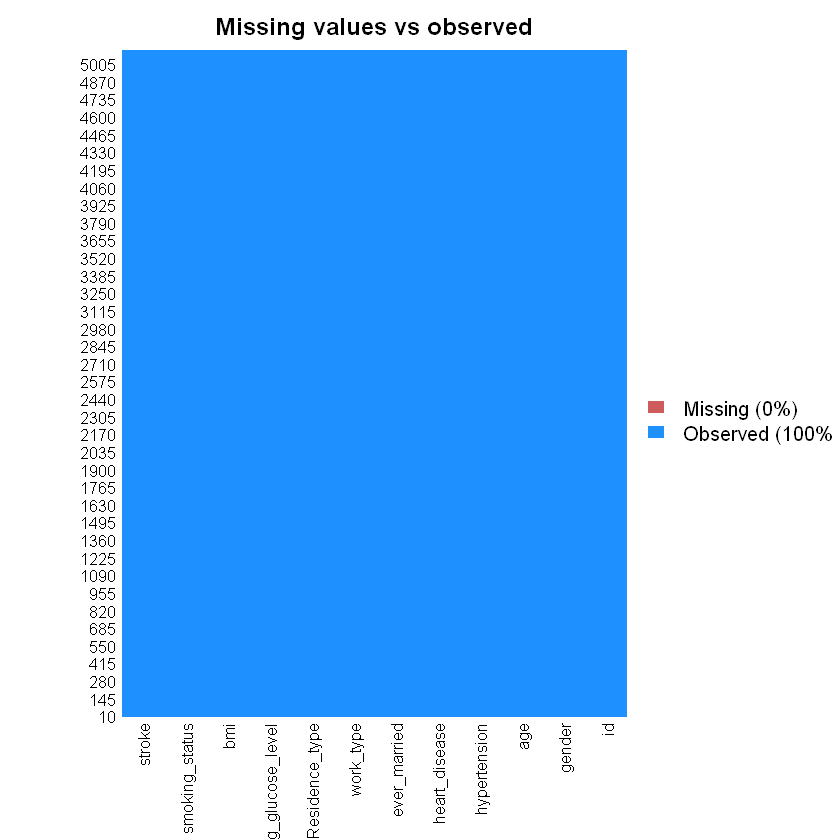

In [19]:
missmap(df, main = "Missing values vs observed")


Target variable
stroke


Categorical variables
stroke, gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status


Continuous variables
age, avg_glucose_level, bmi

Missing values

### Outliers check With Data Visualization

In [4]:
unique(df$stroke)
unique(df$gender)
unique(df$hypertension)
unique(df$heart_disease)
unique(df$ever_married)
unique(df$work_type)
unique(df$Residence_type)
unique(df$smoking_status)

[1] 1 0

[1] Male   Female Other 
Levels: Female Male Other

[1] 0 1

[1] 1 0

[1] Yes No 
Levels: No Yes

[1] Private       Self-employed Govt_job      children      Never_worked 
Levels: children Govt_job Never_worked Private Self-employed

[1] Urban Rural
Levels: Rural Urban

[1] formerly smoked never smoked    smokes          Unknown        
Levels: formerly smoked never smoked smokes Unknown

##### Here identified some outliers  values - gender("other") - smoking_status("Unknown")



In [5]:
table(df$gender)
table(df$smoking_status)
table(df$work_type)
length(df$bmi[df$bmi == "N/A"])


Female   Male  Other 
  2994   2115      1 


formerly smoked    never smoked          smokes         Unknown 
            885            1892             789            1544 


     children      Govt_job  Never_worked       Private Self-employed 
          687           657            22          2925           819 

[1] 201

gender: "other" is one so it will be removed.

bmi: this property has 201 "N/A" string. There are some solution for null but I decide to remove them.

In [6]:
# remove outlier values
df_clean <- df %>% filter(df$gender!='Other')
#df_clean = df_clean %>% filter(df_clean$work_type!='Never_worked')
df_clean = df_clean %>% filter(df_clean$bmi!='N/A')

# convert chr to factors
df_clean$gender = as.factor(df_clean$gender)
df_clean$ever_married = as.factor(df_clean$ever_married)
df_clean$work_type = as.factor(df_clean$work_type)
df_clean$Residence_type = as.factor(df_clean$Residence_type)
df_clean$smoking_status = as.factor(df_clean$smoking_status)
df_clean$bmi = as.numeric(df_clean$bmi)

#Now,check variables with ggplot2 and statistics analysis

        stroke
gender      0    1
  Female 2777  120
  Male   1922   89
  Other     0    0


	Pearson's Chi-squared test with Yates' continuity correction

data:  df_clean$gender and df_clean$stroke
X-squared = 0.16955, df = 1, p-value = 0.6805


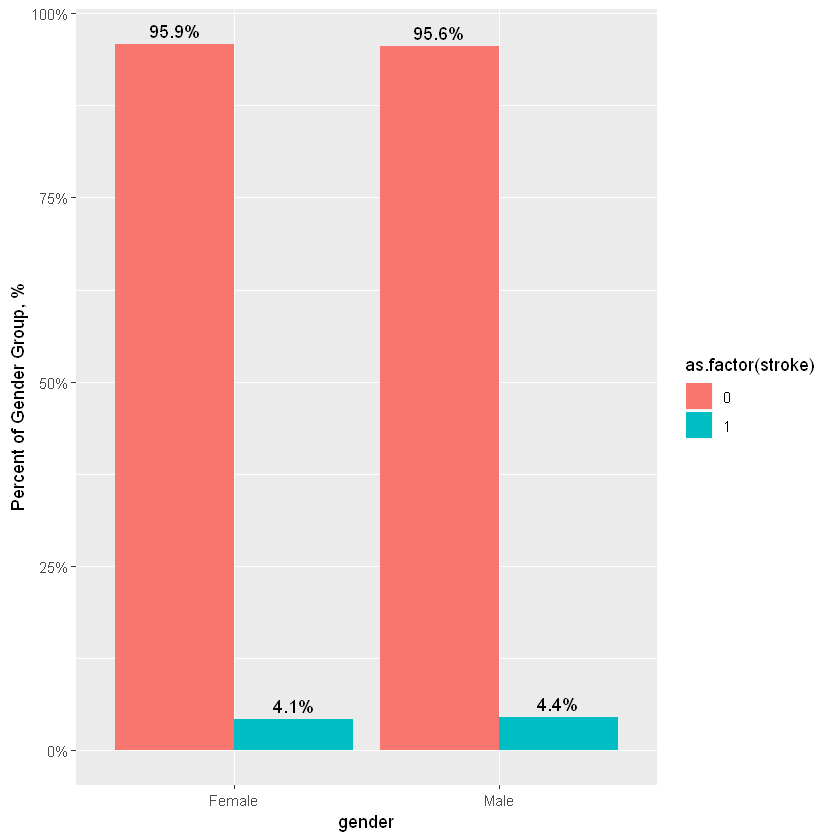

In [7]:
# check gender vs stroke

## check by graph
 ggplot(df_clean, aes(x=gender, fill=as.factor(stroke)))+
  geom_bar(aes(y=..count../tapply(..count.., ..x.., sum)[..x..]), position = "dodge")+
  geom_text(aes( y=..count../tapply(..count.., ..x.. ,sum)[..x..], label=scales::percent(..count../tapply(..count.., ..x.. ,sum)[..x..]) ), stat="count", position=position_dodge(0.9), vjust=-0.5)+ylab('Percent of Gender Group, %') +
  scale_y_continuous(labels = scales::percent)


## check by statistical analysis chisq-test
table(data.frame(gender=df_clean$gender, stroke=df_clean$stroke))
chisq.test(df_clean$gender, df_clean$stroke)
        



As you can see with plot shows you there is no correlation of 'male' and 'female' and p-value = 0.6715>0.05 so that 'gender' has nothing with 'stroke'

            stroke
hypertension    0    1
           0 4308  149
           1  391   60


	Pearson's Chi-squared test with Yates' continuity correction

data:  df_clean$hypertension and df_clean$stroke
X-squared = 97.239, df = 1, p-value < 2.2e-16


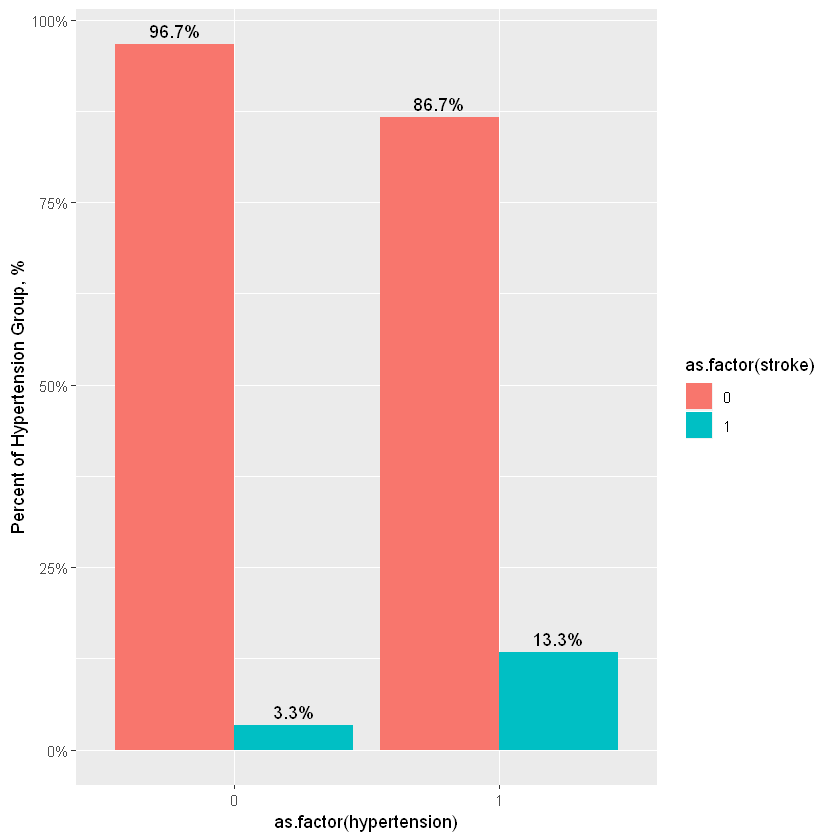

In [8]:
# check hypertesion vs stroke
ggplot(df_clean, aes(x=as.factor(hypertension), fill=as.factor(stroke)))+
  geom_bar(aes(y=..count../tapply(..count.., ..x.., sum)[..x..]), position = "dodge")+
  geom_text(aes( y=..count../tapply(..count.., ..x.. ,sum)[..x..], label=scales::percent(..count../tapply(..count.., ..x.. ,sum)[..x..]) ), stat="count", position=position_dodge(0.9), vjust=-0.5)+ylab('Percent of Hypertension Group, %') +
  scale_y_continuous(labels = scales::percent)

table(data.frame(hypertension=df_clean$hypertension, stroke=df_clean$stroke))
chisq.test(df_clean$hypertension, df_clean$stroke)
# has correlation

Given plot shows you stroke percentage 'hypertension' 1 higher than 'hypertension' 0 and p-value<2.2e-16 so that 'hypertension' is related with stroke

      stroke
gender    0    1
     0 4496  169
     1  203   40


	Pearson's Chi-squared test with Yates' continuity correction

data:  df_clean$heart_disease and df_clean$stroke
X-squared = 90.25, df = 1, p-value < 2.2e-16


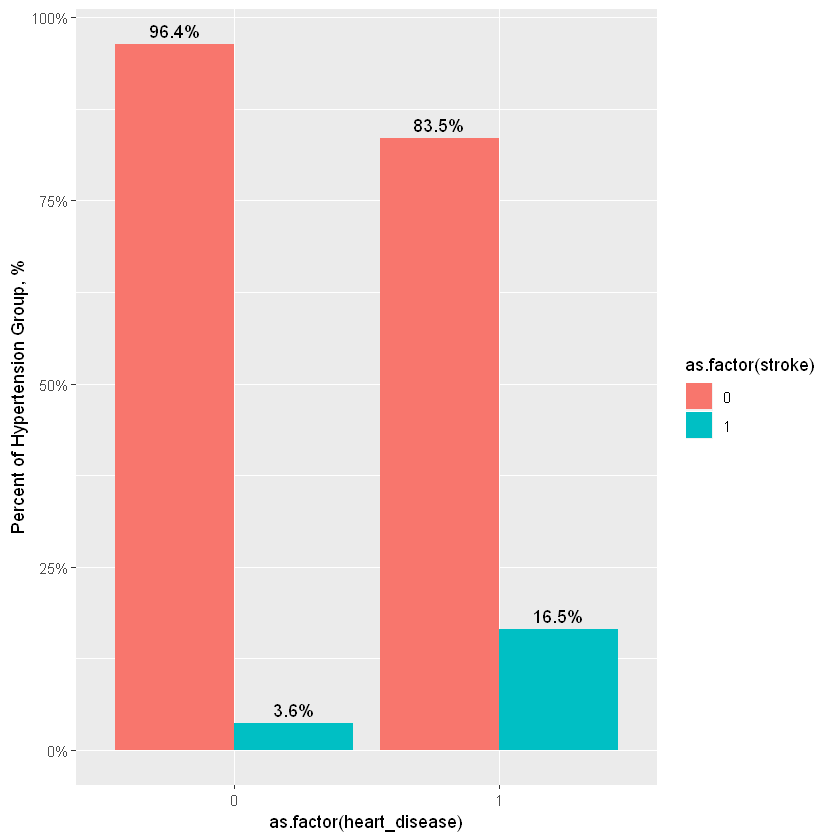

In [9]:
# check heart_disease vs stroke
ggplot(df_clean, aes(x=as.factor(heart_disease), fill=as.factor(stroke)))+
  geom_bar(aes(y=..count../tapply(..count.., ..x.., sum)[..x..]), position = "dodge")+
  geom_text(aes( y=..count../tapply(..count.., ..x.. ,sum)[..x..], label=scales::percent(..count../tapply(..count.., ..x.. ,sum)[..x..]) ), stat="count", position=position_dodge(0.9), vjust=-0.5)+ylab('Percent of Hypertension Group, %') +
  scale_y_continuous(labels = scales::percent)
table(data.frame(gender=df_clean$heart_disease, stroke=df_clean$stroke))
chisq.test(df_clean$heart_disease, df_clean$stroke)

plot shows 'heart_disease' effect to 'stroke' and statistical analyisis has same.



     
         0    1
  No  1681   23
  Yes 3018  186


	Pearson's Chi-squared test with Yates' continuity correction

data:  df_clean$ever_married and df_clean$stroke
X-squared = 53.076, df = 1, p-value = 3.209e-13


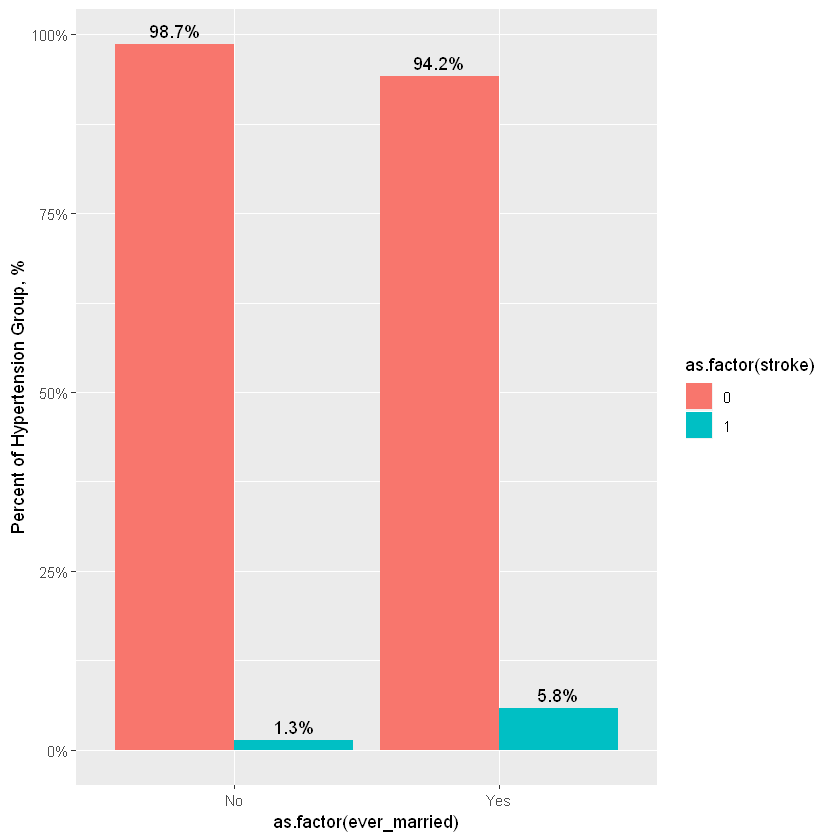

In [10]:
# check ever_married vs stroke
ggplot(df_clean, aes(x=as.factor(ever_married), fill=as.factor(stroke)))+
  geom_bar(aes(y=..count../tapply(..count.., ..x.., sum)[..x..]), position = "dodge")+
  geom_text(aes( y=..count../tapply(..count.., ..x.. ,sum)[..x..], label=scales::percent(..count../tapply(..count.., ..x.. ,sum)[..x..]) ), stat="count", position=position_dodge(0.9), vjust=-0.5)+ylab('Percent of Hypertension Group, %') +
  scale_y_continuous(labels = scales::percent)
table(df_clean$ever_married, df_clean$stroke)
chisq.test(df_clean$ever_married, df_clean$stroke)
# has correlation

'ever_married' has correlation with 'stroke'



               
                   0    1
  children       670    1
  Govt_job       602   28
  Never_worked    22    0
  Private       2683  127
  Self-employed  722   53

Warning message in chisq.test(df_clean$work_type, df_clean$stroke):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  df_clean$work_type and df_clean$stroke
X-squared = 41.951, df = 4, p-value = 1.708e-08


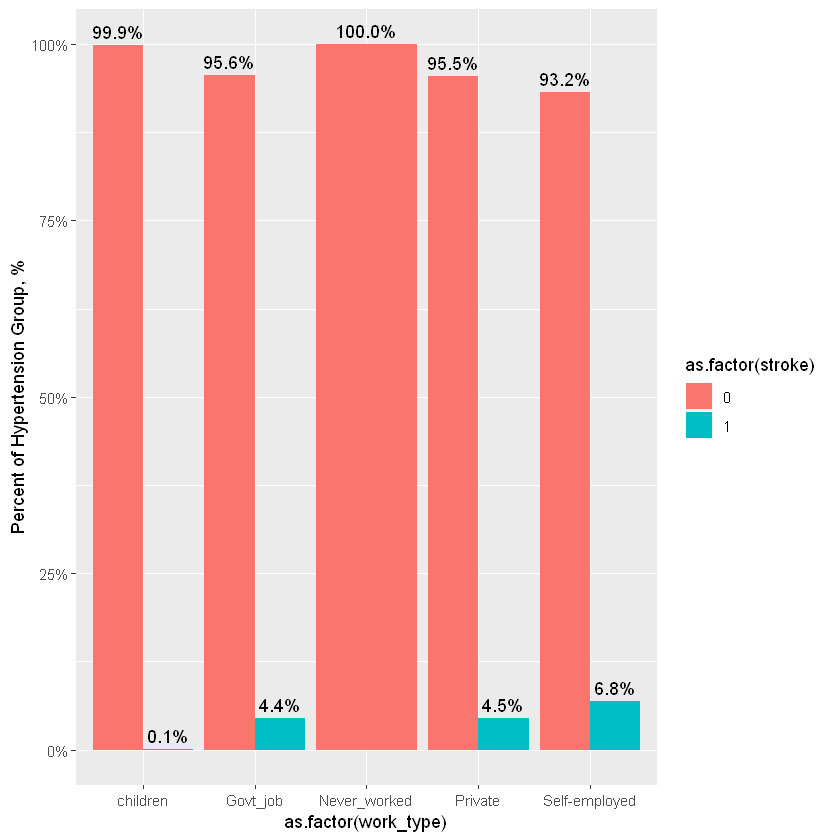

In [11]:
# check worktye vs stroke
ggplot(df_clean, aes(x=as.factor(work_type), fill=as.factor(stroke)))+
  geom_bar(aes(y=..count../tapply(..count.., ..x.., sum)[..x..]), position = "dodge")+
  geom_text(aes( y=..count../tapply(..count.., ..x.. ,sum)[..x..], label=scales::percent(..count../tapply(..count.., ..x.. ,sum)[..x..]) ), stat="count", position=position_dodge(0.9), vjust=-0.5)+ylab('Percent of Hypertension Group, %') +
  scale_y_continuous(labels = scales::percent)
table(df_clean$work_type, df_clean$stroke)
chisq.test(df_clean$work_type, df_clean$stroke)
# has correlation

'work_type' has correlation with 'stroke'. Funny 'never_worked' human dont worry about stroke



       
           0    1
  Rural 2318  100
  Urban 2381  109


	Pearson's Chi-squared test with Yates' continuity correction

data:  df_clean$Residence_type and df_clean$stroke
X-squared = 0.12169, df = 1, p-value = 0.7272


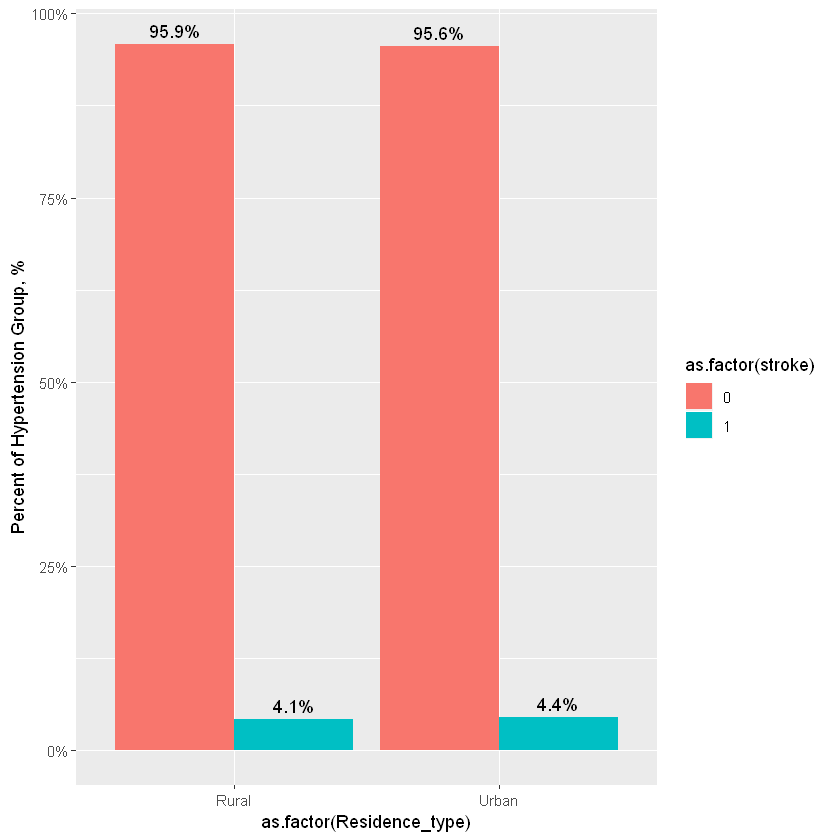

In [12]:
# check Residence_type vs stroke
ggplot(df_clean, aes(x=as.factor(Residence_type), fill=as.factor(stroke)))+
  geom_bar(aes(y=..count../tapply(..count.., ..x.., sum)[..x..]), position = "dodge")+
  geom_text(aes( y=..count../tapply(..count.., ..x.. ,sum)[..x..], label=scales::percent(..count../tapply(..count.., ..x.. ,sum)[..x..]) ), stat="count", position=position_dodge(0.9), vjust=-0.5)+ylab('Percent of Hypertension Group, %') +
  scale_y_continuous(labels = scales::percent)
table(df_clean$Residence_type, df_clean$stroke)
chisq.test(df_clean$Residence_type, df_clean$stroke)

'Residence_type' has a little but ignore this so guess that no correlation



       
           0    1
  Rural 2318  100
  Urban 2381  109


	Pearson's Chi-squared test

data:  df_clean$smoking_status and df_clean$stroke
X-squared = 35.006, df = 3, p-value = 1.215e-07


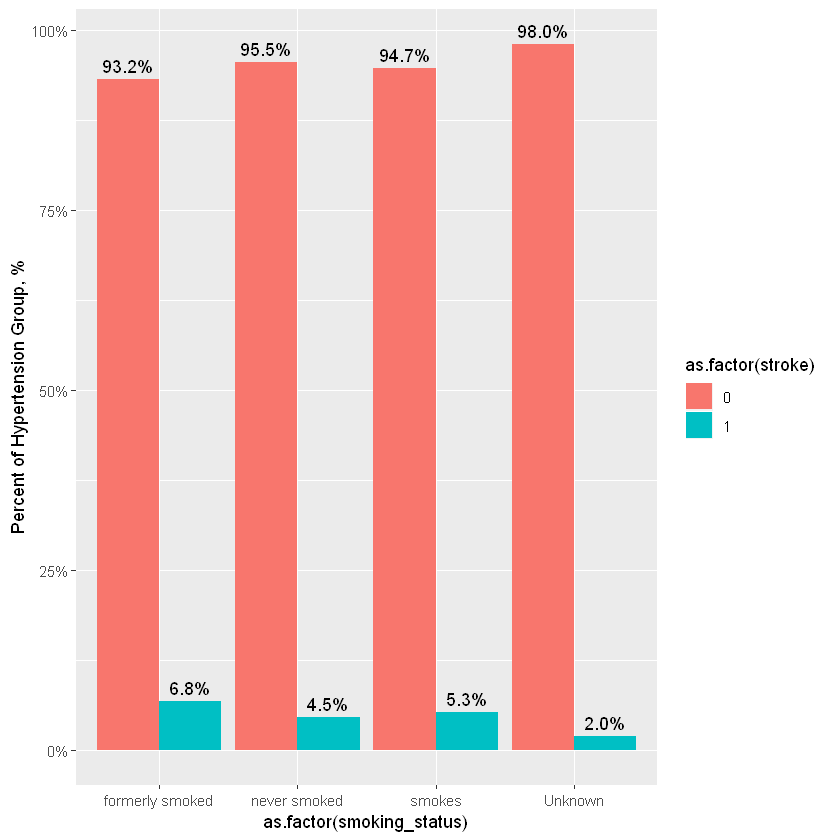

In [13]:
# check Residence_type vs stroke
ggplot(df_clean, aes(x=as.factor(smoking_status), fill=as.factor(stroke)))+
  geom_bar(aes(y=..count../tapply(..count.., ..x.., sum)[..x..]), position = "dodge")+
  geom_text(aes( y=..count../tapply(..count.., ..x.. ,sum)[..x..], label=scales::percent(..count../tapply(..count.., ..x.. ,sum)[..x..]) ), stat="count", position=position_dodge(0.9), vjust=-0.5)+ylab('Percent of Hypertension Group, %') +
  scale_y_continuous(labels = scales::percent)
table(df_clean$Residence_type, df_clean$stroke)
chisq.test(df_clean$smoking_status, df_clean$stroke)


Call:
lm(formula = df_clean$stroke ~ df_clean$avg_glucose_level)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.14522 -0.04649 -0.03284 -0.02319  0.98849 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -2.394e-02  7.345e-03  -3.259  0.00112 ** 
df_clean$avg_glucose_level  6.318e-04  6.427e-05   9.830  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2 on 4906 degrees of freedom
Multiple R-squared:  0.01932,	Adjusted R-squared:  0.01912 
F-statistic: 96.63 on 1 and 4906 DF,  p-value: < 2.2e-16


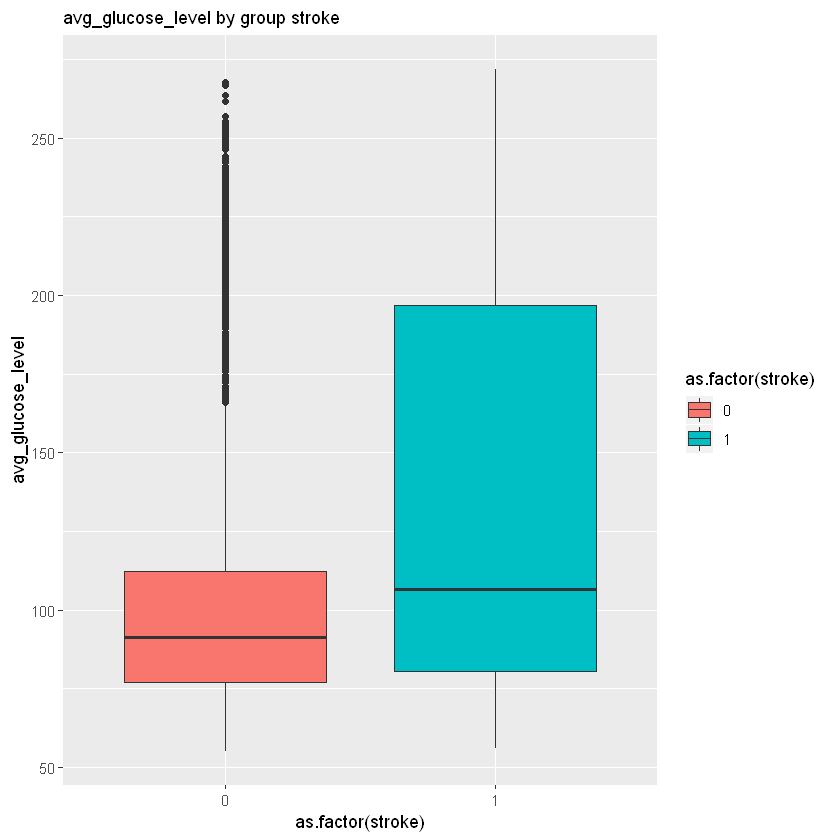

In [14]:
#check avg_glucose_level vs stroke
ggplot(df_clean, aes(x=as.factor(stroke), y=avg_glucose_level, fill=as.factor(stroke))) + 
  geom_boxplot() + 
  labs(subtitle="avg_glucose_level by group stroke")
lm.stroke_glucose <- lm(df_clean$stroke ~ df_clean$avg_glucose_level)
summary(lm.stroke_glucose)

Boxplot shows you 'avg_glucose_level' has correlation with 'stroke' and in lm() function summary shows reducing Std. Error from 7.372e-03 to 6.447e-05, Pr <2e-16 so that has correlation!




Call:
lm(formula = df_clean$stroke ~ df_clean$age)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.12397 -0.07405 -0.03870  0.00290  1.01746 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.0465756  0.0060220  -7.734 1.25e-14 ***
df_clean$age  0.0020798  0.0001243  16.730  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1964 on 4906 degrees of freedom
Multiple R-squared:  0.05397,	Adjusted R-squared:  0.05378 
F-statistic: 279.9 on 1 and 4906 DF,  p-value: < 2.2e-16


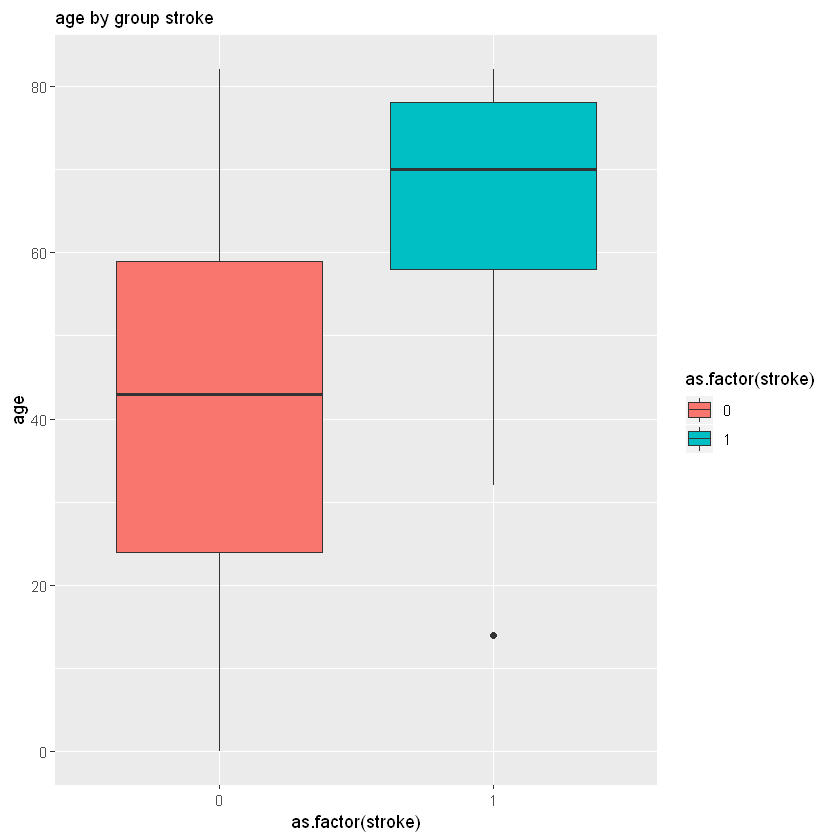

In [15]:
#check avg_glucose_level vs stroke
ggplot(df_clean, aes(x=as.factor(stroke), y=age, fill=as.factor(stroke))) + 
  geom_boxplot() + 
  labs(subtitle="age by group stroke")
lm.stroke_age <- lm(df_clean$stroke ~ df_clean$age)
summary(lm.stroke_age)

'age' has correlation with 'stroke'




Call:
lm(formula = df_clean$stroke ~ df_clean$bmi)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.07409 -0.04750 -0.04109 -0.03506  0.97208 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.262e-02  6.850e-03   3.303 0.000964 ***
df_clean$bmi 1.231e-04  3.834e-05   3.211 0.001331 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2017 on 4906 degrees of freedom
Multiple R-squared:  0.002097,	Adjusted R-squared:  0.001894 
F-statistic: 10.31 on 1 and 4906 DF,  p-value: 0.001331


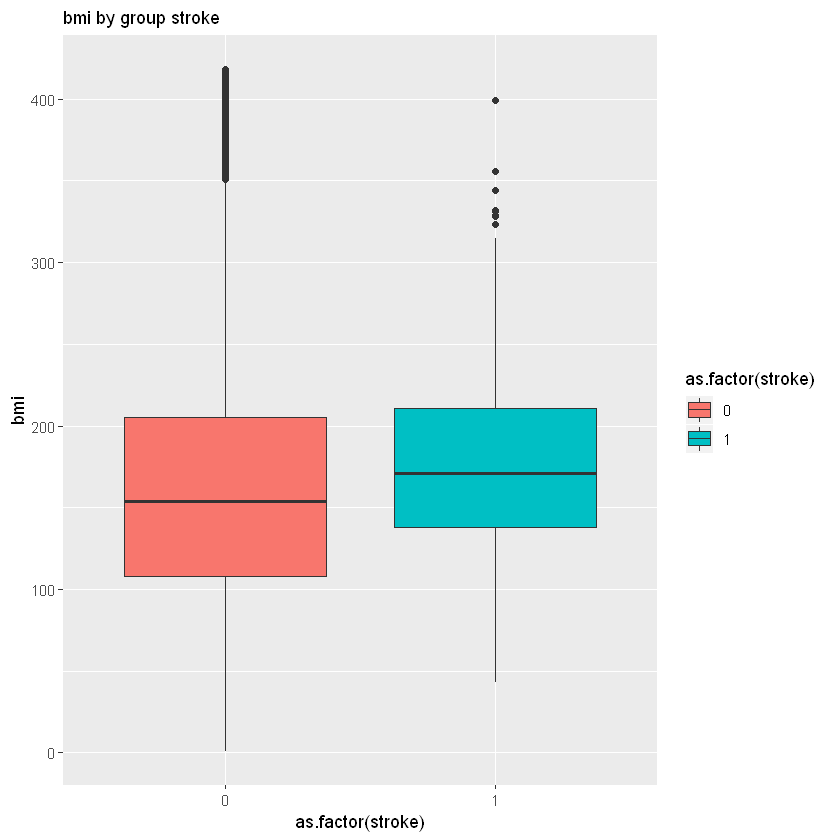

In [16]:
#check avg_glucose_level vs stroke
ggplot(df_clean, aes(x=as.factor(stroke), y=bmi, fill=as.factor(stroke))) + 
  geom_boxplot() + 
  labs(subtitle="bmi by group stroke")
lm.stroke_bmi <- lm(df_clean$stroke ~ df_clean$bmi)
summary(lm.stroke_bmi)

'bmi' has a little correlation with 'stroke'



# 4. Data Manipulation


Data preprocessing

Remove useless features in dataframe and shuffle index

Create dataset for training and test

In [17]:
library(corrplot)

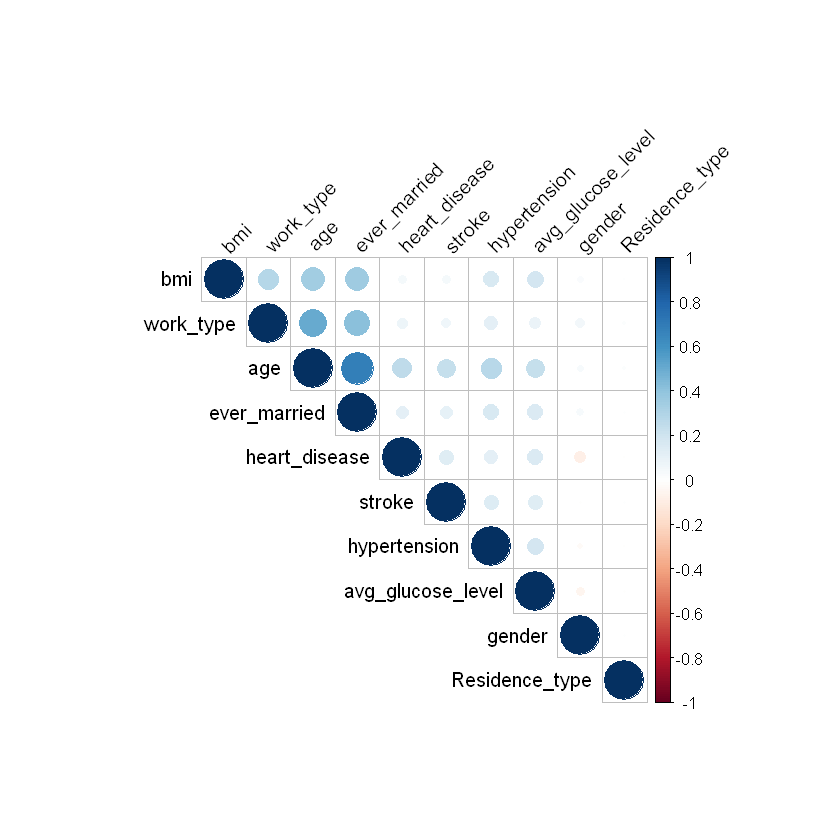

In [18]:
#Data preprocessing
df_num <- data.frame(df_clean)
df_num$ever_married = str_replace_all(df_num$ever_married, c("Yes"="1", "No"="0"))
df_num$ever_married = as.numeric(df_num$ever_married)

df_num$gender = str_replace_all(df_num$gender, c("Male"="1", "Female"="2"))
df_num$gender = as.numeric(df_num$gender)

df_num$work_type = str_replace_all(df_num$work_type, c("Never_worked"="0","children"="1", "Private"="2", "Self-employed"="3", "Govt_job"="4"))
df_num$work_type = as.numeric(df_num$work_type)

df_num$Residence_type = str_replace_all(df_num$Residence_type, c("Rural"="1", "Urban"="2"))
df_num$Residence_type = as.numeric(df_num$Residence_type)

df_num$stroke = as.numeric(as.character(df_num$stroke))

df_num$smoking_status = as.numeric(df_num$smoking_status)

drop_smoke<-c("smoking_status","id")
df_num <- df_num[,!(names(df_num) %in% drop_smoke)]


res <- cor(df_num)
corrplot(res, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

In [20]:
# create training or test for neural network without missing features

# remove useless features
drop <- c("id","gender", "Residence_type")
df_num = df_num[,!(names(df_num) %in% drop)]

# shuffle index
set.seed(42)
rows<-sample(nrow(df_num))
df_shuffled<-df_num[rows,]

# split Train data and test data
train <- df_shuffled[1:4000,]
test <- df_shuffled[4001:4908,]

# 5. Modeling

Model : Logistic Regression

In [21]:
# apply model
model <- glm(stroke ~., family=binomial(link='logit'), data=train)
summary(model)
anova(model, test="Chisq")

# accuracy
fitted.results <- predict(model,newdata=subset(test,select=c(1,2,3,4,5,6,7)),type='response')
fitted.results <- ifelse(fitted.results > 0.5,1,0)
misClasificError <- mean(fitted.results != test$stroke)
print(paste('Accuracy',1-misClasificError))


Call:
glm(formula = stroke ~ ., family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2876  -0.2902  -0.1520  -0.0769   3.5555  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -7.488e+00  5.739e-01 -13.049  < 2e-16 ***
age                7.052e-02  6.425e-03  10.975  < 2e-16 ***
hypertension       6.536e-01  1.855e-01   3.523 0.000427 ***
heart_disease      4.487e-01  2.186e-01   2.053 0.040104 *  
ever_married      -1.156e-01  2.630e-01  -0.439 0.660367    
work_type         -1.539e-01  1.175e-01  -1.309 0.190474    
avg_glucose_level  5.545e-03  1.423e-03   3.898 9.71e-05 ***
bmi                7.927e-05  1.340e-03   0.059 0.952811    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1443.6  on 3999  degrees of freedom
Residual deviance: 1125.1  on 3992  degrees of freedom

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,3999,1443.635,NA
age,1,2.774976e+02,3998,1166.137,2.635862e-62
hypertension,1,1.719972e+01,3997,1148.938,3.364858e-05
heart_disease,1,6.177506e+00,3996,1142.760,1.293846e-02
ever_married,1,7.883826e-02,3995,1142.681,7.788780e-01
work_type,1,1.874575e+00,3994,1140.807,1.709520e-01
avg_glucose_level,1,1.574383e+01,3993,1125.063,7.252409e-05
bmi,1,3.498943e-03,3992,1125.059,9.528311e-01


[1] "Accuracy 0.964757709251101"


## Accuracy: 96.475%

# RESULTS:

### Target variable : Stroke



### Categorical variables :stroke, gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status


### Continuous variables :age, avg_glucose_level, bmi

## interpreting Results

In [ ]:
96.475% of a patient is likely to get stroke  based on the categorical variables on the datasset

# Thank you